<a href="https://colab.research.google.com/github/sudharshanpaul/Pneumonia-Prediction/blob/main/Pneumonia_xrayVGG16_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Trained Model ***VGG16***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing the required Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_size = 100

## Loading the Pre-Trained Model

In [ ]:
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (img_size, img_size, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Freeze the layers of the pre-trained model

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

#### Add Custom Layers for Classification

In [ ]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

#### Create a New Model

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

#### Compile the Model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Image Preprocessing

#### Define the image generator for training and validation data

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = '/content/drive/MyDrive/chest_xray/train'
val_dir = '/content/drive/MyDrive/chest_xray/val'

#### Create the image generator for training and validation data

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary')

Found 5226 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Train the Model

In [ ]:
model.fit(train_generator, epochs=10, validation_data=val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 802s 5s/step - accuracy: 0.8304 - loss: 0.3723 - val_accuracy: 0.8750 - val_loss: 0.2643
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 75s 459ms/step - accuracy: 0.9439 - loss: 0.1510 - val_accuracy: 0.7500 - val_loss: 0.5287
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 77s 470ms/step - accuracy: 0.9475 - loss: 0.1337 - val_accuracy: 0.8125 - val_loss: 0.3493
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 77s 468ms/step - accuracy: 0.9540 - loss: 0.1303 - val_accuracy: 0.7500 - val_loss: 0.3399
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 79s 479ms/step - accuracy: 0.9474 - loss: 0.1318 - val_accuracy: 0.7500 - val_loss: 0.3374
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 76s 460ms/step - accuracy: 0.9563 - loss: 0.1300 - val_accuracy: 0.7500 - val_loss: 0.3975
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 76s 461ms/step - accuracy: 0.9595 - loss: 0.1061 - val_accuracy: 0.7500 - val_loss: 0.4369
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 75s 456ms/step - accuracy: 0.9625 - loss: 0.1

#### Evaluate the model

In [ ]:
test_dir = '/content/drive/MyDrive/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary',shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy is {test_acc}')

Found 624 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 210s 11s/step - accuracy: 0.8989 - loss: 0.2721
Test accuracy is 0.9150640964508057


#### Saving the pre-trained model

In [ ]:
model.save('Custom_pre_trained_model_10.h5')

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,378,053 (70.11 MB)

 Trainable params: 1,221,121 (4.66 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,442,244 (9.32 MB)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0006-0001.jpeg', target_size=[img_size, img_size])
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)


In [ ]:
CATEGORIES = ['NORMAL', 'PNEUMONIA']

In [ ]:
prediction = model.predict(test_image)
print(prediction[0][0])
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
0.008758435
NORMAL


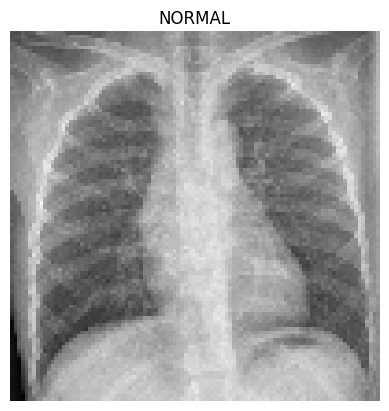

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = test_image[0]  # remove batch dimension
imgplot = plt.imshow(img)
plt.title(CATEGORIES[int(round(prediction[0][0]))])
plt.axis('off')
plt.show()

In [ ]:
test_image = image.load_img('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg', target_size=[img_size, img_size])
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

In [ ]:
prediction = model.predict(test_image)
print(prediction[0][0])
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
0.9999597
PNEUMONIA


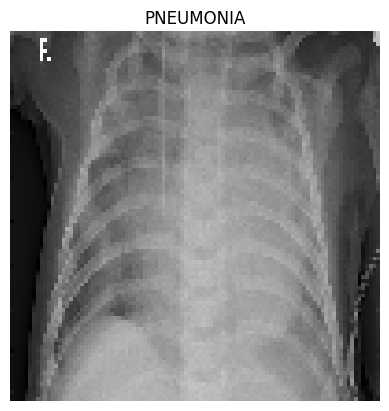

In [ ]:
img = test_image[0]  # remove batch dimension
imgplot = plt.imshow(img)
plt.title(CATEGORIES[int(round(prediction[0][0]))])
plt.axis('off')
plt.show()